<a href="https://colab.research.google.com/github/robertomoragad/Estadistica/blob/master/Test_de_Hipotesis_Error_tipo_II_(beta).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Primero Importamos Librerias de la siguiente forma: 
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt #importando matplotlib

**En esta sección se encuentra un ejercicio para entender Error tipo II (beta)**


Cuando realizamos una prueba de hipótesis podemos cometer dos tipos de error: tipo I y tipo II. Los riesgos de estos dos errores están inversamente relacionados y se determinan según el nivel de significancia y la potencia de la prueba. Por tanto ninguna prueba de hipótesis es 100% cierta. 

**Error tipo I:**
Cuando rechazamos la hipótesis nula cuando es verdadera, cometemos un error de tipo I. La probabilidad de cometer un error de tipo I es α, que es el nivel de significancia que estableces para la prueba de hipótesis.

**Error tipo II:**
El error tipo II es el riesgo de no rechazar una hipotesis nula que es falsa. La probabilidad de cometer un error de tipo II es β, que depende de la potencia de la prueba. Podemos reducir el riesgo de cometer un error de tipo II al asegurarse de que la prueba tenga suficiente potencia. Para ello, debemos asegurarnos de que el tamaño de la muestra es lo suficientemente grande como para detectar una diferencia práctica cuando esta realmente exista.


A continuación un resumen visual:


**intro**
<img src='https://drive.google.com/uc?export=view&id=1D5hnaRxeMWMO9UhSkVex4dvKZ-Sl2v9m' width="900" align="left" style="margin-right: 20px"> 
<br>

<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga</p>

Para hacer variar el error tipo I y el error tipo II tenemos algunas alternativas:


**intro**
<img src='https://drive.google.com/uc?export=view&id=1KJqey0330cf61i7ITpwgokZ4L007lnCJ' width="900" align="left" style="margin-right: 20px"> 
<br>

<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga</p>

...como hemos visto, en la eventualidad de no rechaza H0, siendo esta falsa, se puede cometer el error denominado error tipo II. (error beta)


Pero cómo calculamos el beta?. Este dato sería una información relevante a la hora de comunicar en un estudio de contraste el valor de este tipo de error.  En algunos software de análisis estadísticos no entregan información de este tipo  de error ya que sería necesario incorporar el valor de H1. 

Existe una forma de estimar este tipo de error II si hacemos alguna suposición (no estadística) dirigida por críterios expertos en el fenomeno que estemos estudiando.


Supongamos que queremos demostrar que el gasto promedio de los clientes ante una campaña comercial es más de 28 dolares con un nivel de significación del 5%. Se sabe que la desviación std poblacional es 3,7 dolares. Para ello se consideró una muestra de 32 clientes para la que se obtuvo una media de 29.

Planteamos el problema en python:

In [56]:
# 0)  calcular estadisticos muestra
xbar = 29
sigma = 3.7
n = 32

print('sigma poblacion: ', sigma)
print('Xbarra: ',xbar)
print('tamaño muestra: ', n)

sigma poblacion:  3.7
Xbarra:  29
tamaño muestra:  32


In [67]:
#como n > 30 y sí se conoce Sigma, aplicaremos Z 
#asumimos que datos se distribuyen normal X-N(mu, sigma)

# 1) Definir hipotesis a contrastar (prueba unilateral - 1 cola)
  #H0:   Mu <= 28
  #H1:   Mu >  28


alpha = 0.1
Mu_h0 = 28

# 2) buscar valor critico de Z
Zcritico = stats.norm.ppf(1-(alpha))# 1 cola
print('Z critico: ', Zcritico)


# 3) calcular Estadistico de prueba Z
Z =  (xbar - Mu_h0) / (sigma / np.sqrt(n)) #utilizar sigma poblacion
print('Z: ',Z)


# 4) Definir Regla decisión
#no rechazar H0 si:  Z <= Z crítico
#rechazar H0 si:  Z > Zcritico  


# 5) buscar el valor en dolares correspondiente al Z critico

x = Mu + (Zcritico * (sigma / np.sqrt(n)))
print('X promedio para Z=1,64: ',x)

# otra forma mas simple con Stats usando ppf
x_b = stats.norm(Mu_h0, sigma/np.sqrt(n)).ppf(0.95)
print('X promedio para Z=1,64: ',x_b)


Z critico:  1.2815515655446004
Z:  1.5288795268898323
X promedio para Z=1,64:  28.83822926725406
X promedio para Z=1,64:  29.075855617150925


Conclusión:  como estadístico Z de prueba es menor a Z crítico, no se rechaza la H0, es decir, el gasto medio por cliente en esta campaña es menor o igual a 28 dolares.

Otra vista:
Si se observa el Xpromedio que corresponde a Zcritico es 29,076 dolares,  esto quiere decir si el valor del promedio de la muestra de 32 personas es menor a esa suma, no se puede rechazar la H0.



---

Ahora haremos una suposición no estadística, basado en juico experto, de que en realidad el gasto promedio de los clientes era mayor a 28 dolares (utilizaremos un valor por ejemplo de 30 dolares = h1).

Cuál sería la probabilidad de que en la distribución de medias muestrales de tamaño 32 de una población con media poblacional de 30 dolares nos encontremos con medias de menos a 29,076 dolares (Z critico). 

In [69]:
# aca vamos a calcular la probabilidad de que las medias muestrales de la poblacion Mu=30 (H1) sean menor a 29,076
# Xbar - N(30, 3.7)    (asumimos normalidad)

#H1
Mu_h1= 30 
x = x # 29,076 dolares

Z1 = (x - Mu_h1)/ (sigma/ np.sqrt(n))
print('Z1: ',Z1)

#ahora calcular es probabilidad, esta corresponde al error tipo II
beta = stats.norm.cdf(Z1)
print('Beta: ', beta)

#otra forma con stats
beta_b = stats.norm(Mu_h1, sigma/np.sqrt(n)).cdf(x)
print('Beta: ',beta_b)




Z1:  -1.7762074882350656
Beta:  0.03784936224232311
Beta:  0.03784936224232311


Por tanto el error tipo II (Beta) con esta suposición (no sujeta de criterio estadístico)  de Mu= 30 dolares es de 0,0788.  
La potencia de la prueba es de 0,9212 (1- beta).

--

Pudes probar: 
*  reduciendo el alpha a 0,01, con lo cual el beta aumentará de 0,0788 a 0,2322 
*  aumentando el alpha a 0,10,  con lo cual el beta se reducirá de 0,0788 a 0,0378 

*(manteniendo constante el tamaño muestra, sigma poblacion y el supuesto de H1)*.

Adicional a lo anterior puedes probar haciendo ajustes con el tamaño de la muestra.

Graficando las curvas de medias muestrales de H0 y H1.

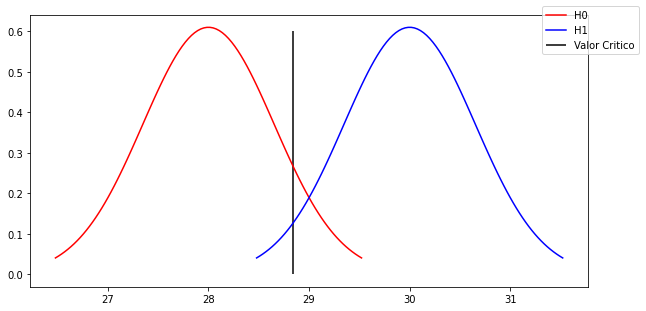

In [68]:
#graficar H0 y H1
#proyectar distribucion medias H0 con n=32
medias_h0 = stats.norm(Mu_h0, sigma / np.sqrt(n))
x_medias_h0 = np.linspace(medias_h0.ppf(0.01), medias_h0.ppf(0.99), 100)
pdf_medias_h0 = medias_h0.pdf(x_medias_h0) #funcion densidad probabilidad

#proyectar distribucion medias H1 con n=32
medias_h1 = stats.norm(Mu_h1, sigma / np.sqrt(n))
x_medias_h1 = np.linspace(medias_h1.ppf(0.01), medias_h1.ppf(0.99), 100)
pdf_medias_h1 = medias_h1.pdf(x_medias_h1) #funcion densidad probabilidad



plt.figure(figsize=(10, 5)) #tamaño grafico
plt.plot(x_medias_h0, pdf_medias_h0,"r") #medias h0 fit
plt.plot(x_medias_h1, pdf_medias_h1,"b", ) #medias h1 fit
plt.vlines(ymin=0, ymax=0.6, x=x)#Z critico
plt.legend(['H0','H1', 'Valor Critico'],bbox_to_anchor=(1.1,1.05))
plt.show()
